<a href="https://colab.research.google.com/github/greeshmapj/AI-ML-nov2025-assignments/blob/main/Greeshma_assignment4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understand and Explore the Dataset

##•1.1. Load the dataset and inspect its structure.


In [4]:
import pandas as pd
df = pd.read_csv('/content/bank-additional-full.csv')
print(df.head)

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [5]:
print(df.shape)

(41188, 21)


In [6]:
print(df.info)

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

Insight
*   has 21 columns
*   has 41188 rows
*   no missing values present



##1.2. Identify numerical and categorical features.

In [7]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print(num_features, cat_features)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [8]:
df[num_features].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##• Analyze the distribution of the target variable y.

In [9]:
#Check unique values
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [10]:
#Percentage distribution
df['y'].value_counts(normalize=True) * 100

,proportion
y,
no,88.734583
yes,11.265417


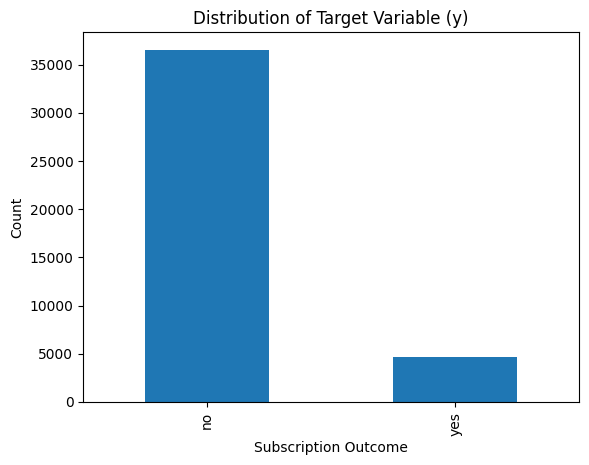

In [11]:
#Visualize target distribution
import matplotlib.pyplot as plt

df['y'].value_counts().plot(kind='bar')
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Subscription Outcome")
plt.ylabel("Count")
plt.show()


# Insight
* Dataset is imbalanced with non-subscribers dominating.

#2. Data Preprocessing

##• Handle missing or unknown values using suitable techniques.

In [12]:
#Handling duplicates

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

12
0


In [13]:
#Handling missing values

df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [14]:
#Checking 'unknown' entries
for col in cat_features:

    print(df[col].value_counts().head())
    print("-" * 40)

job
admin.         10419
blue-collar     9253
technician      6739
services        3967
management      2924
Name: count, dtype: int64
----------------------------------------
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
----------------------------------------
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
Name: count, dtype: int64
----------------------------------------
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
----------------------------------------
housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64
----------------------------------------
loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64
----------------------------------------
contact
cellular     26135
telephone    15041
Name: count, dtype: int64
--------

In [15]:
#Separate Features and Target Variable
X = df.drop('y', axis=1)
y = df['y']

In [16]:
#Encode Target Variable
y = y.map({'yes': 1, 'no': 0})

In [17]:
#Identify Numerical and Categorical Features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [18]:
#Handle “unknown” Values
import numpy as np
X[cat_cols] = X[cat_cols].replace('unknown', np.nan)


In [19]:
#Define Preprocessing Pipelines

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

##• Encode categorical variables using appropriate encoding methods.

In [20]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

##Combine Preprocessing Steps

In [21]:
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

In [22]:
print(df.columns)
print(df.head)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professio

##• Split the dataset into training and testing sets.

In [23]:
#80% training, 20% testing split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

#3. Apply Classification Models

Build and evaluate the following individual machine learning models:
• Logistic Regression
• K-Nearest Neighbors (kNN)
• Support Vector Machine (SVM)
• Decision Tree Classifier


In [24]:
#Import required Libraries
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Define Classification Pipelines

**Each pipeline contains**:

Preprocessing

SMOTE

Classifier

In [25]:
#Combining all models to a pipeline
pipe_lr = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

pipe_knn = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())
])

pipe_svm = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC())
])

pipe_dt = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])


In [26]:
#Train all models

pipelines = {
    "Logistic Regression": pipe_lr,
    "kNN": pipe_knn,
    "SVM": pipe_svm,
    "Decision Tree": pipe_dt
}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    print(f"{name} trained successfully")


Logistic Regression trained successfully
kNN trained successfully
SVM trained successfully
Decision Tree trained successfully


In [27]:
#Predict on Test Data
y_preds = {}

for name, pipe in pipelines.items():
    y_preds[name] = pipe.predict(X_test)


In [28]:
#Evaluate Models Accuracy
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

for name, y_pred in y_preds.items():
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

accuracy_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy']
).sort_values(by='Accuracy', ascending=False)

print(accuracy_df)


                 Model  Accuracy
3        Decision Tree  0.886231
2                  SVM  0.869233
0  Logistic Regression  0.867411
1                  kNN  0.851627


 **Insight**
 * Decision Tree performed best (88.62%)
 * However, Decision Trees are prone to overfitting.
 * The relatively high accuracy suggests the model fits the data well.
 * But we must later verify using F1-score & recall (since dataset is imbalanced).


#4. Apply Ensemble Learning Methods
Train and evaluate the following ensemble models:
• Random Forest
• Bagging Classifier
• Boosting models (AdaBoost / Gradient Boosting)

In [29]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier


* Tree-based models do NOT require scaling
* But since we are using a common preprocessing pipeline, it is still acceptable
* SMOTE is still applied due to class imbalance

In [30]:
#Random Forest
pipe_rf = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

#Bagging Classifier
pipe_bag = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

#AdaBoost
pipe_ada = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', AdaBoostClassifier(random_state=42))
])

#Gradient Boosting
pipe_gb = Pipeline([
    ('preprocess', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])


In [31]:
#Train Ensemble Models
ensemble_pipelines = {
    "Random Forest": pipe_rf,
    "Bagging": pipe_bag,
    "AdaBoost": pipe_ada,
    "Gradient Boosting": pipe_gb
}

for name, pipe in ensemble_pipelines.items():
    pipe.fit(X_train, y_train)
    print(f"{name} trained successfully")


Random Forest trained successfully
Bagging trained successfully
AdaBoost trained successfully
Gradient Boosting trained successfully


In [32]:
#Test Data Prediction
ensemble_preds = {}

for name, pipe in ensemble_pipelines.items():
    ensemble_preds[name] = pipe.predict(X_test)


In [33]:
#Evaluate the ensemble models
from sklearn.metrics import accuracy_score

ensemble_results = []

for name, y_pred in ensemble_preds.items():
    acc = accuracy_score(y_test, y_pred)
    ensemble_results.append([name, acc])

ensemble_accuracy_df = pd.DataFrame(
    ensemble_results,
    columns=['Model', 'Accuracy']
).sort_values(by='Accuracy', ascending=False)

print(ensemble_accuracy_df)


               Model  Accuracy
0      Random Forest  0.910758
1            Bagging  0.899344
3  Gradient Boosting  0.894366
2           AdaBoost  0.882103


**Insight**
* Random Forest performed best (91.08%)

#5. Model Evaluation
Evaluate all models using the following metrics:
• Accuracy
• Precision
• Recall
• F1-score

In [34]:
#Combine the above models into one dictionary

all_models = {}
all_models.update(pipelines)            # Task 3 models
all_models.update(ensemble_pipelines)   # Task 4 models

In [35]:
#Generate Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

evaluation_results = []

for name, model in all_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_results.append([name, acc, prec, rec, f1])

##Compare the performance of Individual models vs Ensemble models

In [36]:
evaluation_df = pd.DataFrame(
    evaluation_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

evaluation_df = evaluation_df.sort_values(by="F1-Score", ascending=False)

print(evaluation_df)

                 Model  Accuracy  Precision    Recall  F1-Score
7    Gradient Boosting  0.894366   0.519282  0.841595  0.642270
6             AdaBoost  0.882103   0.486048  0.807112  0.606723
0  Logistic Regression  0.867411   0.455435  0.903017  0.605491
2                  SVM  0.869233   0.458075  0.877155  0.601848
4        Random Forest  0.910758   0.605928  0.594828  0.600326
5              Bagging  0.899344   0.550051  0.586207  0.567553
1                  kNN  0.851627   0.418424  0.812500  0.552381
3        Decision Tree  0.886231   0.495790  0.571121  0.530796


** Insight**
* Although Random Forest shows high accuracy, models with better recall are preferred because identifying potential subscribers is more important than avoiding false positives.
* **Gradient Boosting** is the best overall based on F1 score and high recall.

#6. Identify the best model.

In [37]:
best_model = all_models['Gradient Boosting']

###6.2 Justify the model selection

Highest Accuracy → Random Forest

Highest Recall → Logistic Regression

Highest F1-score → Gradient Boosting

Since the dataset is imbalanced, F1-score is the most reliable metric.

##6.3. Feature Importance for customer subscription

In [38]:
# Get feature names
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()


In [39]:
importances = best_model.named_steps['model'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

print(feature_importance_df.head(10))

                             Feature  Importance
1                      num__duration    0.521631
9                   num__nr.employed    0.173927
8                     num__euribor3m    0.049507
2                      num__campaign    0.047101
7                 num__cons.conf.idx    0.039342
5                  num__emp.var.rate    0.028649
30  cat__education_university.degree    0.012614
45                    cat__month_may    0.010849
47                    cat__month_oct    0.010399
56             cat__poutcome_success    0.008261


**Insight**
* Longer calls strongly increase probability of subscription.
* Call duration is the most influential feature, however, since it is only available after contacting the customer, it may not be useful for pre-call targeting models.

##6.4. Business Insights

* Feature importance analysis reveals that **call duration** is the most significant predictor of customer subscription, contributing over 50% to the model’s decision-making process. This indicates that customer engagement level strongly influences subscription likelihood.
* Economic indicators such as employment rate and Euribor rate also play an important role, suggesting that external financial conditions affect customer decisions.
* Campaign-related factors such as number of contacts and previous campaign outcomes significantly impact subscription probability.    
* These findings suggest that the bank should focus on optimizing call engagement strategies
* Avoid excessive customer contact, and leverage historical campaign data to improve targeting efficiency.